<a href="https://colab.research.google.com/github/ongfong/data_analysis_projects/blob/main/calculate_ema_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'],format="%Y/%m/%d")
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [10]:
df = df.rename(columns={'Name':'Ticks'})
df.head()

,date,open,high,low,close,volume,Ticks
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
null = df.isnull().sum()
print(null)

date       0
open      11
high       8
low        8
close      0
volume     0
Ticks      0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
null = df.isnull().sum()
print(null)

date      0
open      0
high      0
low       0
close     0
volume    0
Ticks     0
dtype: int64


In [14]:
aapl = df.loc[df['Ticks'] == 'AAPL']
aapl.head()

,date,open,high,low,close,volume,Ticks
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [15]:
print(aapl.shape)

(1259, 7)


In [16]:
def calculate_ema(prices, days, smoothing=2):
    #SMA of the first days numbers.
    ema = [sum(prices[:days]) / days]
    #use the EMA formula to calculate the EMA for the days+1 th number.
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema

In [17]:
ema_20 = calculate_ema(aapl['close'],20)
ema_50 = calculate_ema(aapl['close'],50)
ema_200 = calculate_ema(aapl['close'],200)

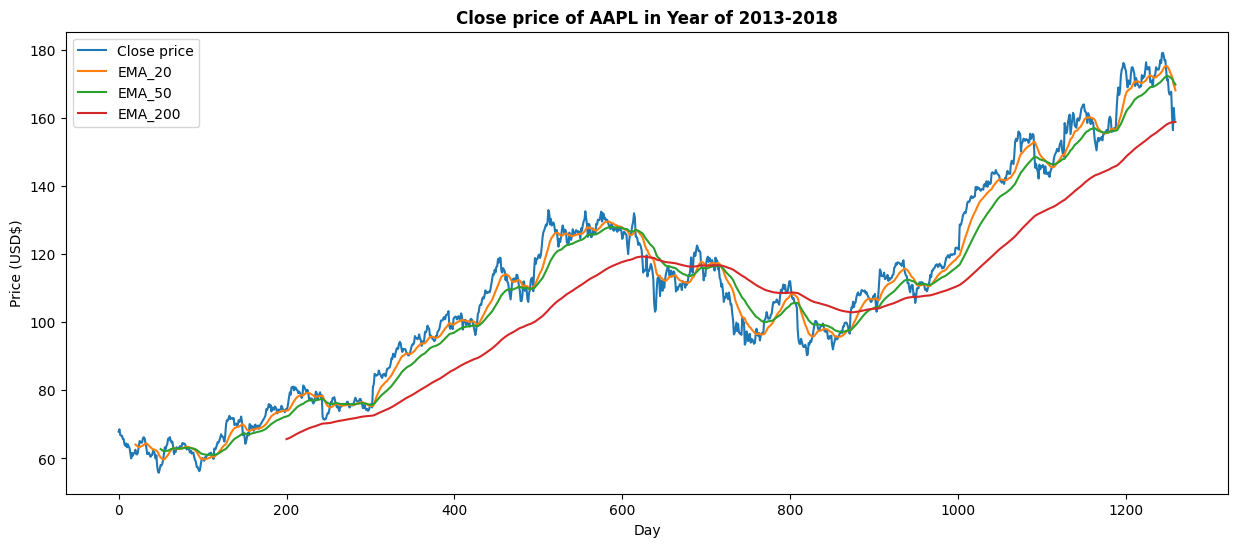

In [30]:
index_X = np.arange(aapl.shape[0])

ema_x_20 = np.arange(20, aapl.shape[0]+1) #start,end
ema_x_50 = np.arange(50, aapl.shape[0]+1)
ema_x_200 = np.arange(200, aapl.shape[0]+1)

plt.figure(figsize=(15,6))
plt.plot(index_X,aapl['close'], label='Close price')
plt.plot(ema_x_20,ema_20, label='EMA_20')
plt.plot(ema_x_50,ema_50, label='EMA_50')
plt.plot(ema_x_200,ema_200, label='EMA_200')

plt.title('Close price of AAPL in Year of 2013-2018',fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Price (USD$)')
plt.legend()
plt.show()